In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Convolution2D as conv2D
from keras.layers import AveragePooling2D, MaxPooling2D 

from keras import metrics
from keras import backend as K

%matplotlib inline

Using MXNet backend


## En este escrito se ha diseñado la arquitectura de VGG16 y se ha usado el dataset de CIFAR10

In [2]:
print(K.image_data_format())

channels_last


In [3]:
# FORMATOS 

if K.image_data_format() == 'channels_first':
    data_format = 'channels_first' #Para MXNET
    #input_shape = (3,224,224)
    input_shape = (3,32,32)
else:
    data_format = 'channels_last' #Para TensorFlow
    #input_shape = (224,224,3)
    input_shape = (32,32,3)


In [4]:
#ARQUITECTURA RED 
#SECUENCIAL DENTRO DE UNA FUNCION
"""
Los parametros de las capas conv2d y Maxpool y las fully-connected son tomadas del siguiente articulo 
https://arxiv.org/pdf/1409.1556v6.pdf. Articulo original.
"""


def VGG16():
    
    padding = 'same'
    activ1 = 'relu'
        
    model = Sequential()
    
    # 1-BLOQUE
    # Layer1
    model.add(conv2D(filters = 64,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l1Conv2D'))
    model.add(BatchNormalization(axis=1))
    # Layer2
    model.add(conv2D(filters = 64,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l2Conv2D'))
    model.add(BatchNormalization(axis=1))
    # Layer3
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides = 2,
                           padding= padding,
                           data_format=data_format,
                           name = 'l3Maxpool2D'))
    
    # 2-BLOQUE
    # Layer4
    model.add(conv2D(filters = 128,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l4Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer5
    model.add(conv2D(filters = 128,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l5Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer6
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides = 2,
                           padding= padding,
                           data_format=data_format,
                           name = 'l6Maxpool2D'))
    
    # 3-BLOQUE
    # Layer7
    model.add(conv2D(filters = 256,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l7Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer8
    model.add(conv2D(filters = 256,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l8Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer9
    model.add(conv2D(filters = 256,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l9Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer10
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides = 2,
                           padding= padding,
                           data_format=data_format,
                           name = 'l10Maxpool2D'))
    
    # 4-BLOQUE
    # Layer11
    model.add(conv2D(filters = 512,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l11Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer12
    model.add(conv2D(filters = 512,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l12Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer13
    model.add(conv2D(filters = 512,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l13Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer14
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides = 2,
                           padding= padding,
                           data_format=data_format,
                           name = 'l14Maxpool2D'))
    
    # 5-BLOQUE
    # Layer15
    model.add(conv2D(filters = 512,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l15Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer16
    model.add(conv2D(filters = 512,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l16Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer17
    model.add(conv2D(filters = 512,
                    kernel_size=(3,3),
                    strides = (1,1),
                    padding = padding,
                    data_format = data_format,
                    activation = activ1,
                    name = 'l17Conv2D'))
    model.add(BatchNormalization(axis=1))
    
    # Layer18
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides = 2,
                           padding= padding,
                           data_format=data_format,
                           name = 'l18Maxpool2D'))
    
    model.add(Flatten())
    model.add(Dense(units = 4096, activation = activ1))
    model.add(Dropout(0.5))
    model.add(Dense(units = 4096, activation = activ1))
    model.add(Dropout(0.5))
    model.add(Dense(units = 1000, activation = 'softmax'))
    
    
    return model    


In [5]:
# Cargar el modelo (la red neuronal)
model = VGG16()

In [6]:
from keras.datasets import cifar10

In [7]:
# Cargar los datos para el entrenamiento y el test

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [12]:
#Esta linea es usada para redimensionar las imagenes

"""
import cv2

import time

#imag_filas, imag_columnas, channel = 224, 224, 3
imag_filas, imag_columnas, channel = 32, 32, 3

#data_rescalado = []



def resize_data(data):
    data_rescalado = np.zeros((data.shape[0], imag_filas, imag_columnas, channel))
    #data_rescalado = np.zeros((imag_filas, imag_columnas, channel))
    for j in range(channel):
        for i, img in enumerate(data):
            large_img = cv2.resize(img, dsize=(imag_filas, imag_columnas), interpolation=cv2.INTER_CUBIC)
            data_rescalado[i,:,:,j] = large_img

    return data_rescalado
    #return large_img

star_time = time.time()    
x_train_resized = resize_data(x_train2)  
x_test_resized = resize_data(x_test2)  
#y_train_resized = resize_data(y_train2)  
#y_train_resized = y_train2  
#y_test_resized = resize_data(y_test2)  
#y_test_resized = y_test2  
end_time = time.time()
print("tiempo de computo %f [s]"%(end_time-star_time))

"""


'\nimport cv2\n\nimport time\n\n#imag_filas, imag_columnas, channel = 224, 224, 3\nimag_filas, imag_columnas, channel = 32, 32, 3\n\n#data_rescalado = []\n\n\n\ndef resize_data(data):\n    data_rescalado = np.zeros((data.shape[0], imag_filas, imag_columnas, channel))\n    #data_rescalado = np.zeros((imag_filas, imag_columnas, channel))\n    for j in range(channel):\n        for i, img in enumerate(data):\n            large_img = cv2.resize(img, dsize=(imag_filas, imag_columnas), interpolation=cv2.INTER_CUBIC)\n            data_rescalado[i,:,:,j] = large_img\n\n    return data_rescalado\n    #return large_img\n\nstar_time = time.time()    \nx_train_resized = resize_data(x_train2)  \nx_test_resized = resize_data(x_test2)  \n#y_train_resized = resize_data(y_train2)  \n#y_train_resized = y_train2  \n#y_test_resized = resize_data(y_test2)  \n#y_test_resized = y_test2  \nend_time = time.time()\nprint("tiempo de computo %f [s]"%(end_time-star_time))\n\n'

In [17]:
from keras.utils.np_utils import to_categorical

#Convierte el y_train y y_test en numeros binarios para la comparacion

y_train = to_categorical(y_train, num_classes = 1000)
y_test = to_categorical(y_test, num_classes = 1000)

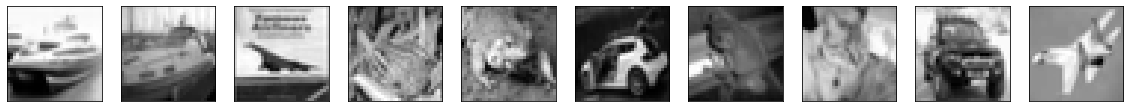

In [21]:
#visualizacion de los digitos
#from matplotlib.pyplot import cmap


n = 10
plt.figure(figsize=(20, 2))
#for i in range(1,n+1):
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    #Para channels_last
    plt.imshow(x_test[i,:,:,1].reshape(32, 32), cmap='gray')
    #Para channels_first
    #plt.imshow(x_test[i,1,:,:].reshape(32, 32), cmap='gray')
    #arr=np.array([x_test[i,0,:,:],x_test[i,1,:,:],x_test[i,2,:,:]])
    #print(arr.shape)
    #plt.imshow(arr)
    #plt.()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#plt.show()

In [25]:
#compilar las neuronas 
from keras.losses import categorical_crossentropy
from keras.optimizers import adam

# Cuando se esta corriendo el GPU
# Como se tienen dos GPUS se agrega la siguiente linea
gpu_list = ["gpu(0)", "gpu(1)"] 

#adam = adam(lr=0.0001)

#model.compile(optimizer= 'adadelta', loss = 'binary_crossentropy', metrics=['accuracy','mae'])
#model.compile(optimizer= 'adadelta', loss = 'categorical_crossentropy', metrics=['accuracy','mae'])
model.compile(optimizer= 'adadelta', loss = 'categorical_crossentropy', metrics=['accuracy','mae'], context=gpu_list)

In [26]:
import time 

time_star2 = time.time()

history = model.fit(x=x_train, y=y_train, 
                    batch_size =500 ,
                    epochs=10,
                    validation_data=(x_test, y_test), 
                    shuffle=True, verbose = 1)

time_end2 = time.time()
print("tiempo de computo %f [s]"%(time_end2-time_star2))

/usr/local/lib/python3.5/dist-packages/keras/backend/mxnet_backend.py:96: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/usr/local/lib/python3.5/dist-packages/keras/backend/mxnet_backend.py:99: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input

Train on 50000 samples, validate on 10000 samples
Epoch 1/10


/usr/local/lib/python3.5/dist-packages/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.002). Is this intended?
  force_init=force_init)


50000/50000 [==============================] - 97s 2ms/step - loss: 2.8582 - acc: 0.1003 - mean_absolute_error: 0.0018 - val_loss: 2.4195 - val_acc: 0.1539 - val_mean_absolute_error: 0.0018
Epoch 2/10
50000/50000 [==============================] - 91s 2ms/step - loss: 2.1441 - acc: 0.1770 - mean_absolute_error: 0.0017 - val_loss: 2.4367 - val_acc: 0.1376 - val_mean_absolute_error: 0.0017
Epoch 3/10
50000/50000 [==============================] - 91s 2ms/step - loss: 1.8952 - acc: 0.2549 - mean_absolute_error: 0.0016 - val_loss: 2.1750 - val_acc: 0.2550 - val_mean_absolute_error: 0.0016
Epoch 4/10
50000/50000 [==============================] - 91s 2ms/step - loss: 1.7042 - acc: 0.3413 - mean_absolute_error: 0.0015 - val_loss: 1.4187 - val_acc: 0.4571 - val_mean_absolute_error: 0.0013
Epoch 5/10
50000/50000 [==============================] - 91s 2ms/step - loss: 1.4549 - acc: 0.4609 - mean_absolute_error: 0.0013 - val_loss: 1.3672 - val_acc: 0.5086 - val_mean_absolute_error: 0.0011
Epoch 

In [29]:
score = model.evaluate(x_test, y_test, batch_size=500)
#score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 570us/step


In [30]:
print(score)

[0.7973026901483535, 0.7397000014781951, 0.0006393216433934867]


In [31]:
model.save_weights("model_VGG16_CIFAR10_adadelta.h5")

'\nplt.figure(0)  \nplt.plot(history.history[\'acc\'],\'r\')  \nplt.plot(history.history[\'val_acc\'],\'g\')  \nplt.xticks(np.arange(0, 11, 2.0)) \nplt.grid(True)\nplt.rcParams[\'figure.figsize\'] = (8, 6)  \nplt.xlabel("Num of Epochs")  \nplt.ylabel("Accuracy")  \nplt.title("Training Accuracy vs Validation Accuracy")  \nplt.legend([\'train\',\'validation\'])\n\n\nplt.figure(1)  \nplt.plot(history.history[\'loss\'],\'r\')  \nplt.plot(history.history[\'val_loss\'],\'g\')  \nplt.xticks(np.arange(0, 11, 2.0))  \nplt.grid(True)\nplt.rcParams[\'figure.figsize\'] = (8, 6)  \nplt.xlabel("Num of Epochs")  \nplt.ylabel("Loss")  \nplt.title("Training Loss vs Validation Loss")  \nplt.legend([\'train\',\'validation\'])\n'

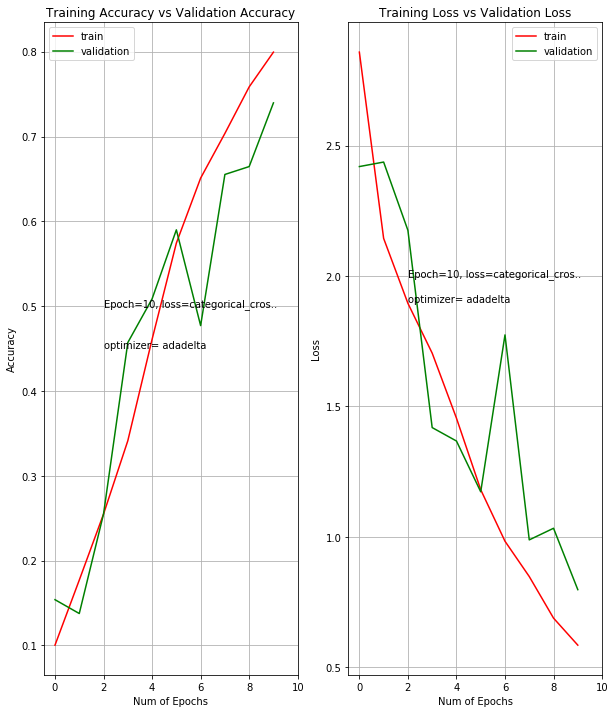

In [32]:
#Graficas de los valores entrenamiento 


fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 12))

ax0.plot(history.history['acc'],'r')  
ax0.plot(history.history['val_acc'],'g')  
ax0.set_xticks(np.arange(0, 11, 2.0))  
ax0.grid(True)
#ax0.set_rcParams['figure.figsize'] = (8, 6)  
ax0.set_xlabel("Num of Epochs")  
ax0.set_ylabel("Accuracy")  
ax0.set_title("Training Accuracy vs Validation Accuracy")  
ax0.legend(['train','validation'])
ax0.text(2, 0.5, r'Epoch=10, loss=categorical_cros..')
ax0.text(2, 0.45, r'optimizer= adadelta')
#plt.savefig('Training_validation_acc_E10_adadelta')


#plt.figure(1)  
ax1.plot(history.history['loss'],'r')  
ax1.plot(history.history['val_loss'],'g')  
ax1.set_xticks(np.arange(0, 11, 2.0))  
ax1.grid(True)
#ax1.rcParams['figure.figsize'] = (8, 6)  
ax1.set_xlabel("Num of Epochs")  
ax1.set_ylabel("Loss")  
ax1.set_title("Training Loss vs Validation Loss")  
ax1.legend(['train','validation'])
ax1.text(2, 2, r'Epoch=10, loss=categorical_cros..')
ax1.text(2, 1.9, r'optimizer= adadelta ')

plt.savefig('Training_validation_E10_adadelta_cifar.png')



"""
plt.figure(0)  
plt.plot(history.history['acc'],'r')  
plt.plot(history.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0)) 
plt.grid(True)
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])


plt.figure(1)  
plt.plot(history.history['loss'],'r')  
plt.plot(history.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.grid(True)
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])
"""
